In [36]:
%load_ext autoreload
%autoreload 2

import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
import sir_model
import json
from random import randint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# initialize recording of parameter choices and true/false

param_choices_true_false = []

# USER: set bounds
beta_search_bounds = [0.08,0.1]
gamma_search_bounds = [0.02,0.03]

In [38]:
# USER: list how many points for each parameter you'd like to synthesize

beta_values_to_synthesize = 50
gamma_values_to_synthesize = 50

In [39]:
search_points_beta = np.linspace(beta_search_bounds[0], beta_search_bounds[1], beta_values_to_synthesize)
search_points_gamma = np.linspace(gamma_search_bounds[0], gamma_search_bounds[1], gamma_values_to_synthesize)

In [40]:
# set parameters

for i in range(len(search_points_beta)):
    beta_val = search_points_beta[i]
    for j in range(len(search_points_gamma)):
        gamma_val = search_points_gamma[j]

        # parameters
        def beta(t): return np.piecewise(t, [t>=0], [beta_val])
        def gamma(t): return np.piecewise(t, [t>=0], [gamma_val])


        # USER: set initial conditions
        I0, R0 = 0.01, 0
        S0 = 1-I0-R0
        y0 = S0, I0, R0 # Initial conditions vector
        # USER: set simulation parameters
        dt = 5
        tstart = 0
        tend = 100
        tvect = np.arange(tstart, tend, dt)
        # simulate/solve ODEs
        sim = odeint(sir_model.SIR_model, y0, tvect, args=(beta, gamma))
        S, I, R = sim.T

        # plot results - uncomment next line to plot time series.  not recommended for large numbers of points
        # sir_model.plotSIR(tvect, S, I, R)
        # USER: write query condition.
        query_condition = ((0.15 <= I[10]) and I[10] <= 1.0)
        query = '1' if query_condition else '0'
        
        # log parameters and sat (1)/unsat (0)

        param_assignments = {'beta': beta_val, 'gamma': gamma_val, 'assignment': query} # for "all", go through every option. for "any", only need one good parameter choice.
        param_choices_true_false.append(param_assignments)

In [44]:
print(param_choices_true_false)

id_number = randint(10**5, 10**6 - 1)

with open(f'sir_query_auto_2_param_{id_number}.json', 'w', encoding='utf-8') as f:
    json.dump(param_choices_true_false, f, ensure_ascii=False, indent=4)

[{'beta': 0.08, 'gamma': 0.02, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.02020408163265306, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.020408163265306124, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.020612244897959184, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.020816326530612245, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.021020408163265305, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.02122448979591837, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.02142857142857143, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.02163265306122449, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.021836734693877553, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.022040816326530613, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.022244897959183673, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.022448979591836733, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.022653061224489797, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.022857142857142857, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.023

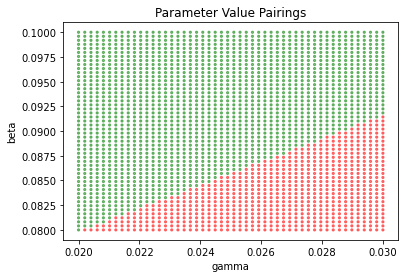

In [42]:
# Plot "true/false" points.  Is there any way of characterizing these regions?


xsample = [result['gamma'] for result in param_choices_true_false]
ysample = [result['beta'] for result in param_choices_true_false]
colors = ['green' if result['assignment'] == '1' else 'red' for result in param_choices_true_false]
plt.title("Parameter Value Pairings")
plt.xlabel("gamma")
plt.ylabel("beta")

area = 5  # size of marker

plt.scatter(xsample, ysample, s=area, c=colors, alpha=0.5)

# 1d - change color coding
# val = 0. # this is the value where you want the data to appear on the y-axis.
# plt.plot(xsample, np.zeros_like(xsample) + val, 'x', c='green')

plt.show()

In [43]:
print(param_choices_true_false)

[{'beta': 0.08, 'gamma': 0.02, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.02020408163265306, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.020408163265306124, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.020612244897959184, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.020816326530612245, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.021020408163265305, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.02122448979591837, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.02142857142857143, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.02163265306122449, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.021836734693877553, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.022040816326530613, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.022244897959183673, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.022448979591836733, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.022653061224489797, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.022857142857142857, 'assignment': '0'}, {'beta': 0.08, 'gamma': 0.023